In [1]:
""" import useful functions """

import matplotlib.pyplot as plt 
import pyccl as ccl
import numpy as np
import scipy
%matplotlib inline

In [2]:
""" define functions """

# gives X(z) as defined in (8) Wang and Mota (note - k vanishes when calculating X)

def X(z, cosmo, alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + \
                   alpha_tilde*(1 - 2*Omega_k + Omega_k**2)
    
    return 1 + 4 * alpha_tilde * (Omega_m * (1 + z) ** 3 + Omega_r * (1 + z)** 4 + Omega_lambda)

# gives E(z) = H(z) / H0

def E(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + \
                   alpha_tilde*(1 - 2*Omega_k + Omega_k**2)

    if alpha_tilde == 0:
        ans = np.sqrt(Omega_m * (1 + z) ** 3 + Omega_r * (1 + z) ** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)
    else:
        # my calculations
        ans = np.sqrt(((2 * alpha_tilde * Omega_k * (1 + z) ** 2) - 1 + np.sqrt(X(z , cosmo , alpha_tilde))) / (2 * alpha_tilde))
        
    return ans
    
# gives dH/dz  -- Set to WandM

def dHdz(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    
    # my calculations
    dHdz = H0 * ((2 * Omega_k * (1 + z)) + ((3 * Omega_m * (1 + z) ** 2 + 4 * Omega_r * (1 + z) ** 3) \
            / np.sqrt(X(z , cosmo , alpha_tilde)))) / 2*E(z , cosmo , alpha_tilde)
    
    return dHdz

# gives rho_cdm / rho_DE as a function of z   -- Set to WandM

def rho_cdm_frac_rho_de(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    alpha = alpha_tilde / H0**2
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + \
                   alpha_tilde*(1 - 2*Omega_k + Omega_k**2)
    k = - Omega_k * (H0 ** 2)
    a = 1 / (1 + z)
    
    H = H0 * E(z, cosmo, alpha_tilde)
    
    # my calculation
    frac = (3 * (H0 ** 2) * Omega_c * (1 + z) ** 3) / \
    ((3 * (H0 ** 2) * Omega_lambda) - (3 * k / a ** 2) - (3 * alpha * (H ** 2 + k / a ** 2) ** 2))
    
    return frac

# find w = P / pho for dark energy   -- Set to WandM

def omega_de(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    alpha = alpha_tilde / (H0**2)
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + \
                   alpha_tilde*(1 - 2*Omega_k + Omega_k**2)
    k = - Omega_k * (H0 ** 2)
    Lambda = Omega_lambda * 3 * H0 ** 2
    
    a = 1 / (1 + z)
    H = H0 * E(z, cosmo, alpha_tilde)
    
    # my calculations
    ans = - 1 + ((4 * alpha * (H ** 2 + k / a ** 2) * ((H * dHdz(z , cosmo , alpha_tilde) * (1 + z)) + k / a ** 2)) \
                / ((3 * alpha * ((H ** 2 + k / a ** 2) ** 2)) + (3 * k / a ** 2) - Lambda))
    
    
    return ans
    

0.7849079999999999


/tmp/ipykernel_219187/4270434600.py:27: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt(((2 * alpha_tilde * Omega_k * (1 + z) ** 2) - 1 + np.sqrt(X(z , cosmo , alpha_tilde))) / (2 * alpha_tilde))


(0.0, 3.0)

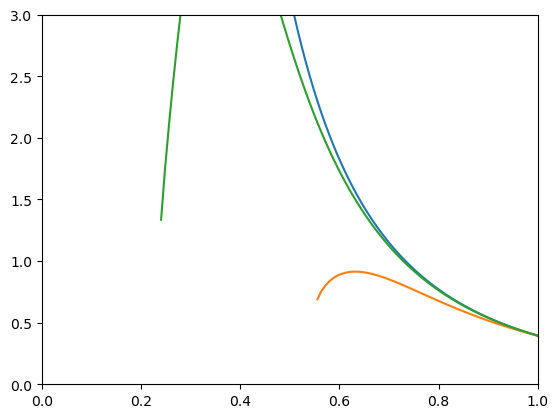

In [3]:
""" Plot FIG 1 Wang and Mota"""

# gives cosmological parameters except alpha

cosmo = [0.6977 , 0.27 , 0.045 , 0 , 9.2e-5]                      #  H0 , Omega_c , Omega_b , Omega_k , Omega_r 

a = np.linspace( 0.2 , 1 , int(1e2))


plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , 0))
alpha_tilde = -1e-1
print(1 - 0.27 - 0.045 - 9.2e-5 - alpha_tilde)

plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde))
alpha_tilde = -1e-2
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde))

plt.xlim(0,1)
plt.ylim(0,3)

(-2.0, 1.0)

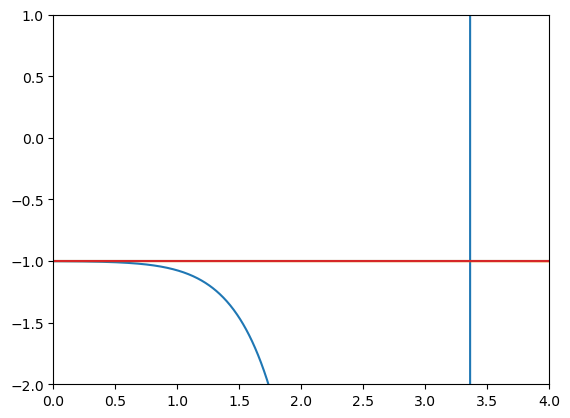

In [4]:
""" Plot FIG 2 Wang and Mota"""

z = np.linspace(0 , 4 , int(1e3))

alpha_tilde = 1e-3
plt.plot(z , omega_de(z , cosmo , alpha_tilde))
alpha_tilde = 1e-8
plt.plot(z , omega_de(z , cosmo , alpha_tilde))
alpha_tilde = 1e-16
plt.plot(z , omega_de(z , cosmo , alpha_tilde))

plt.plot(z , omega_de(z , cosmo , 0))

plt.xlim(0,4)
plt.ylim(-2,1)

(-2.0, 1.0)

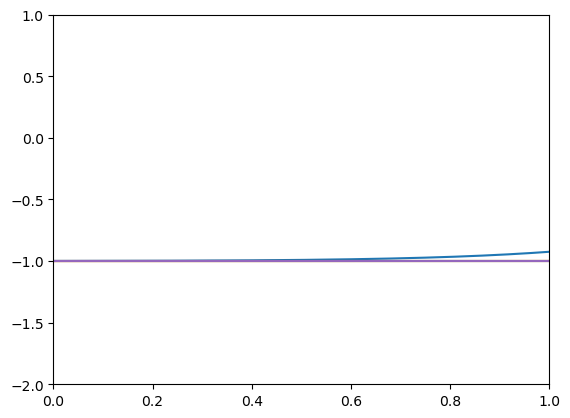

In [5]:
""" Plot FIG 2 Wang and Mota"""

z = np.linspace(0 , 1 , int(1e3))

alpha_tilde = -1e-3
plt.plot(z , omega_de(z , cosmo , alpha_tilde))
alpha_tilde = -1e-5
plt.plot(z , omega_de(z , cosmo , alpha_tilde))
alpha_tilde = -1e-8
plt.plot(z , omega_de(z , cosmo , alpha_tilde))
alpha_tilde = -1e-16
plt.plot(z , omega_de(z , cosmo , alpha_tilde))

plt.plot(z , omega_de(z , cosmo , 0))

plt.xlim(0,1)
plt.ylim(-2,1)